In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('titanicDataset.csv')

In [38]:
df2 = df[['Survived', 'Class', 'Age', 'Embarked']]
df2.dropna(inplace=True)
df2['male'] = df['Sex'] == 'male'
df2.male = df2.male.replace({True: 1, False: 0})
embarked ={"S":0, "C": 1, "Q":2}
df2.Embarked = df2.Embarked.replace(embarked)
print(df2)

     Survived  Class   Age  Embarked  male
0           0      3  22.0         0     1
1           1      1  38.0         1     0
2           1      3  26.0         0     0
3           1      1  35.0         0     0
4           0      3  35.0         0     1
..        ...    ...   ...       ...   ...
885         0      3  39.0         2     0
886         0      2  27.0         0     1
887         1      1  19.0         0     0
889         1      1  26.0         1     1
890         0      3  32.0         2     1

[712 rows x 5 columns]


C:\Users\schauhan2\AppData\Local\Temp\ipykernel_2508\3869968936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)
C:\Users\schauhan2\AppData\Local\Temp\ipykernel_2508\3869968936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['male'] = df['Sex'] == 'male'
C:\Users\schauhan2\AppData\Local\Temp\ipykernel_2508\3869968936.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [39]:
X = df2.values
y = df2['Survived'].values
print(len(X))
print(len(y))


712
712


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train))

498


In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred = model.predict(X_test)
print((y_test == y_pred).sum())


214


In [43]:
ytest_list = y_test.tolist()
ypred_list = y_pred.tolist()

print(ytest_list[:100])
print(ypred_list[:100])

[1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0]
[1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0]


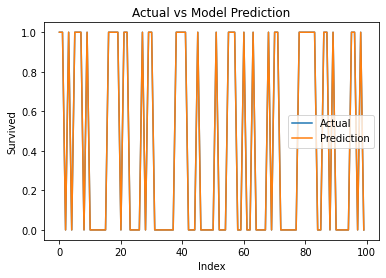

In [45]:


plt.plot([x for x in range(100)], ytest_list[:100], label='Actual')
plt.plot([x for x in range(100)], ypred_list[:100], label='Prediction')
plt.xlabel('Index')
plt.ylabel('Survived')
plt.title('Actual vs Model Prediction')

plt.legend()
plt.show()